In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
mp=pd.read_csv("Mobileprice.csv")

In [3]:
mp.shape

(2000, 21)

In [4]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mp.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
mp_train,mp_test=train_test_split(mp,test_size=0.2)

In [8]:
mp_train_x=mp_train.iloc[:,0:-1]
mp_train_y=mp_train.iloc[:,-1]
mp_test_x=mp_test.iloc[:,0:-1]
mp_test_y=mp_test.iloc[:,-1]

AdaBoostClassifier

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [10]:
boosting=AdaBoostClassifier(n_estimators=100,random_state=43)

In [11]:
boosting.fit(mp_train_x,mp_train_y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=43)

In [12]:
boosting_pred=boosting.predict(mp_test_x)

In [13]:
boosting_acc=accuracy_score(mp_test_y,boosting_pred)
boosting_acc

0.48

Bagging Classifier

In [14]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(n_estimators=100,random_state=67)
bagging.fit(mp_train_x,mp_train_y)
bagging_pred=bagging.predict(mp_test_x)
bagging_acc=accuracy_score(mp_test_y,bagging_pred)
bagging_acc

0.88

RandomForest

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100,random_state=67)
random_forest.fit(mp_train_x,mp_train_y)
random_forest_pred=random_forest.predict(mp_test_x)
random_forest_acc=accuracy_score(mp_test_y,random_forest_pred)
random_forest_acc

0.8725

Text(0.5, 1.0, 'Comparing performances of Ensemble models')

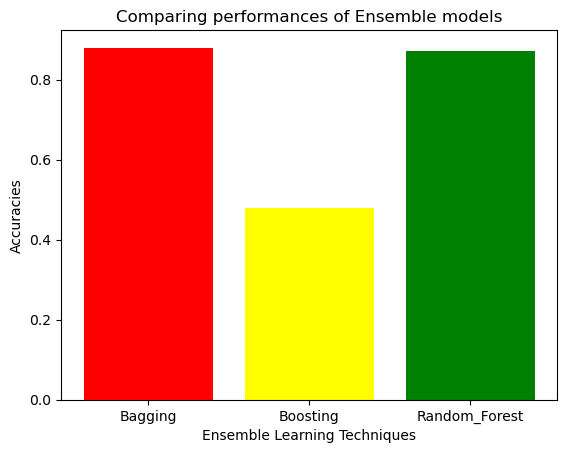

In [16]:
import matplotlib.pyplot as plt
acc=[bagging_acc,boosting_acc,random_forest_acc]
model=["Bagging","Boosting","Random_Forest"]
plt.bar(model,acc,color=('red','yellow','green'))
plt.xlabel("Ensemble Learning Techniques")
plt.ylabel("Accuracies")
plt.title("Comparing performances of Ensemble models")